In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('complete_dataset.txt', sep='\t')

In [4]:
data = data[data.emp_length != 'na']

In [5]:
data['emp_length'].replace(' 1 year', 1, inplace = True)
data['emp_length'].replace('1 year', 1, inplace = True)

In [8]:
X = data[data.columns.difference(['loan_status'])].values
y = data['loan_status'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [11]:
#logistic regression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [12]:
pred = model.predict(X_test)

In [13]:
# Accuracy
testlen = X_test.shape[0]
print(sum([pred[i] == y_test[i] for i in range(testlen)]) / float(testlen))

# Specificity: For those who didn't default, how many did it predict correctly?
print(sum([pred[i] == y_test[i] and pred[i] == 0 for i in range(testlen)]) / float(sum([pred[i] == 0 for i in range(testlen)])))

# Sensitivity: For those who did default, how many did it predict correctly?
print(sum([pred[i] == y_test[i] and pred[i] == 1 for i in range(testlen)]) / float(sum([pred[i] == 1 for i in range(testlen)])))

0.99476
0.997005045736505
0.8474350433044637


In [14]:
# generate metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.roc_auc_score(y_test, pred))

0.99476
[[98204   229]
 [  295  1272]]
0.9047078634778777


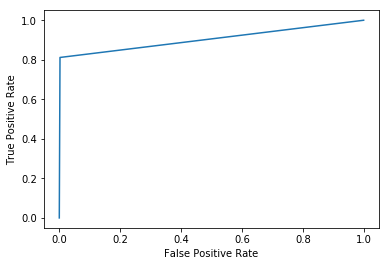

In [17]:
# plot ROC curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#L1, L2 logistic regression - to do mike

In [ ]:
#gradient boosted trees- to do rachel